# Homework 5 - Matplotlab Daniel Teeuwsen

#### Excercise 1

Consider dropping two small rocks in a pond. They enter the water at the same time, at a certain distacne from each other. What is the interference pattern of waves on the surface of the pond? The wave height at point $(x,y)$ from where the first rock entered the water at point $(x_1,y_1)$ is 
$$f(r_1)=A\sin\left(kr_1\right)$$
where $k=2\pi/\lambda$ is the wavenumber related to the wavelength, and 
$$r_1=\sqrt{(x-x_1)^2+(y-y_1)^2}$$
The interference of the two waves is
$$i(r_1,r_2)=A\sin\left(kr_1\right)+A\sin\left(kr_2\right)$$
Let the wavelength be $\lambda=5$ cm, the amplitude be $A=1$ cm, and the rock's points of entry be 20 cm apart.

Write a program to make an image over 1 m<sup>2</sup> of the pond. To make the image create an array of values representing the height of the wave on a grid of points, then make a `pcolormesh` plot. Here is the outline of the code:
```python
# ALL UNITS IN (cm)
wavelength = 5.0
k = 2*numpy.pi/wavelength
seperation = 20.0
side = 100.0
points = 500
spacing = side/points

height = numpy.empty([points,points], float)
   
x1 = side/2 + seperation/2
y1 = side/2
x2 = side/2 - seperation/2
y2 = side/2
```

```c
# INCOMPLETE CODE PRESENTED HERE!
(i: loop over points along x side)
    y = spacing*i
    (j : loop over points along y side)
        x = spacing*j
        r1 = ?
        r2 = ?
        height[i,j] = ?
           
# NOW MAKE THE PLOT
```

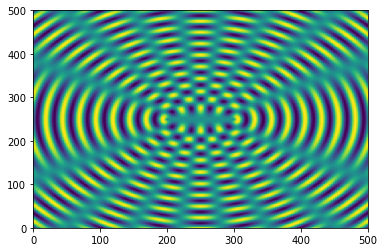

In [26]:
####SOLUTION

%matplotlib inline
import numpy             as np        #load in the necessary packages
import matplotlib.pyplot as plt
import io
#import magic

wavelength = 5.0
A = 1.0
k = 2*np.pi/wavelength               #Initialize the problem constants 
seperation = 20.0
side = 100.0
points = 500
spacing = side/points

height = np.empty([points,points],float)
x1 = side/2 + seperation/2
y1 = side/2                          #Initialize the point array and stone coordinates
x2 = side/2 - seperation/2
y2 = side/2

for i in range(points):              #Load the array with position points of wave interference function
    y = spacing*i
    for j in range(points):
        x = spacing*j
        r1 = np.sqrt((x-x1)**2+(y-y1)**2)
        r2 = np.sqrt((x-x2)**2+(y-y2)**2)
        height[i,j] = A*np.sin(k*r1)+A*np.sin(k*r2)

plt.pcolormesh(height)              #Plot the image of the stones' waves

#### Excercise 2

**Differtial Scanning Calorimtry (DSC)**

The data file `2018-11-22_INDIUM2.csv` was analysed using software that came with the DSC. However, I want to plot it seperately, outside that program, so I exported the data to file. 
* What's the encoding of this file? Use the `file` command on your system.
* How many columns of data are there, and what data are in each column? 
* How many lines of additional information are there before the actual data begins? 
* What type of file is `csv`?

Make a plot of the data, however this time, plot heat flow versus temperature. Use the data from index number 1200 to 2000 only.

Add an annotation arrow indicating the melting point of indium.

<div class="alert alert-block alert-info">
<b>Tip:</b> Note that in this case, you will need to use the <tt>delimiter</tt> option of <tt>numpy.loadtxt</tt> to read around the commas.
</div>

In [33]:
#%%bash          I am running windows. only works unix/macOS
#file "2018-11-22_INDIUM.txt"

**Answer:**

The file is of type ASCII. There are 38 lines of addtional header information before the data. The data is in two columns, temperature in the first column, and DSC in the second. The file format is `csv`, which stands for *[comma seperated values][csv]*. You can think of each number or word between the commas a a cell in a spreadsheet.

[csv]: https://en.wikipedia.org/wiki/Comma-separated_values

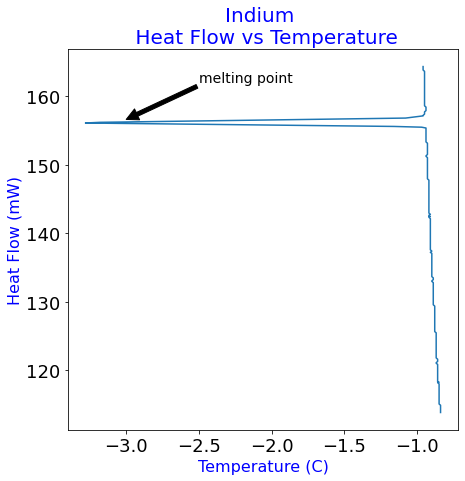

In [70]:
indiumFile = open('2018-11-22_INDIUM.txt','r',encoding='ASCII').read()
filedata_io = io.StringIO(indiumFile)
myData = np.loadtxt(filedata_io,unpack=True,skiprows=37+1199,max_rows=800)

plt.style.use("fast")
plt.figure(figsize=(7,7))
plt.title('Indium \n Heat Flow vs Temperature', fontsize=20, color='blue')
plt.xlabel(r'Temperature (C)', fontsize=16, color='blue')
plt.ylabel(r'Heat Flow (mW)', fontsize=16, color='blue')
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)

plt.plot(myData[1],myData[0])
plt.annotate("melting point", fontsize=14, xy=(-3, 156.6), xytext=(-2.5, 162), arrowprops=dict(facecolor='black'))
plt.show()
plt.close()

#### Excercise 3

The next set of data are from the KSV/Nima Langmuir trough in H208, and are compression isotherms of a [single-molecule thick layer][monolayer] of lipid molecules on the surface of water. 

`09-11-2018_DPPC.txt`

**A.** Show the isotherm by plotting surface pressure ($\pi$ or variable P1) versus mean molecular area (surface area divided by the number of molecules, $A/N$ or variable Mma). In other words, make a plot of the ideal gas law for 2D ($\pi A=Nk_BT$) for constant $T$. 

You will note that over time the surface pressure settles to a value around 45 mN/m for DPPC. So only plot data up to time point of ~1400 seconds.

The *bulk compressibility* of a monolayer film is given by the inverse of the slope of the graph.

$$C = -\frac{1}{A}\left(\frac{\mathrm{d} A}{\mathrm{d}\pi}\right)_T$$

The lowest slope of the graph (at large mean molecular area) is a 2D **gas phase**. The hump in the data is a trasition to a 2D **liquid phase**. Finally, the stepest slope is an uncompressible a **solid phase**.

**B.** Annotate the phases seen in the graph.
    
[monolayer]: https://en.wikipedia.org/wiki/Monolayer


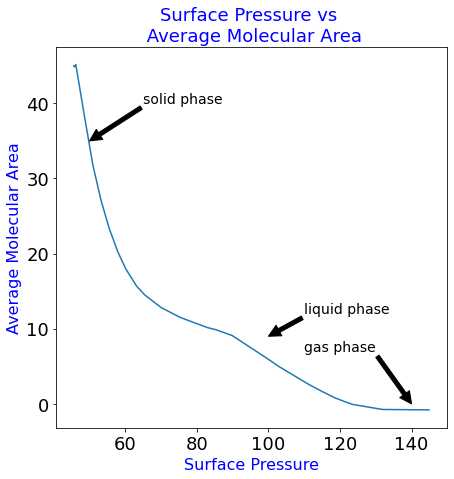

In [123]:
####Part A
isoDataString = open('09-11-2018_DPPC.txt','r',encoding='ISO-8859-1').read()
isoDataIO = io.StringIO(isoDataString)
isoData = np.genfromtxt(isoDataIO, dtype=float, delimiter='\t', skip_header=1, unpack=True)

AoverN = np.extract(isoData[0]<1400,isoData[4]) 
pi  = np.extract(isoData[0]<1400,isoData[5]) 

plt.figure(figsize=(7,7))
plt.title('Surface Pressure vs \n Average Molecular Area', fontsize=18, color='blue')
plt.xlabel(r'Surface Pressure', fontsize=16, color='blue')
plt.ylabel(r'Average Molecular Area', fontsize=16, color='blue')
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)

plt.plot(AoverN,pi)

####Part B
plt.annotate("gas phase", fontsize=14, xy=(140, 0), xytext=(110, 7), arrowprops=dict(facecolor='black'))
plt.annotate("liquid phase", fontsize=14, xy=(100, 9), xytext=(110, 12), arrowprops=dict(facecolor='black'))
plt.annotate("solid phase", fontsize=14, xy=(50, 35), xytext=(65, 40), arrowprops=dict(facecolor='black'))

plt.show()
plt.close()

#### Excercise 4

The next is raw data from the Rigaku X-ray machine in H305. It is reflection of X-rays from a single layer thick film of octadecyl silane grafted to a single silicon crystal.     

`05-03-2017_OTS_REFLECT.ras`

* Follow the example from the lecture notes are plot the data set in its full scan range of $2\theta$. Use a log scale on the y-axis.
* Annotate the peak at low angles to indicate total X-ray reflection from the surface below the critiacl angle.
* Annotate the two minimum showing destrucutive wave interference. The distance between these minimum indicates the thickness of the film.

<div class="alert alert-block alert-info">
    <b>Tip:</b> This is not a normal powder diffraction scan; it is a reflectivity curve. You will see there are three scan ranges where the counting time was changed. The intensity is recourded as counts per second, so you need to multiply the intensity times the counting time to connect the different regions.
</div>

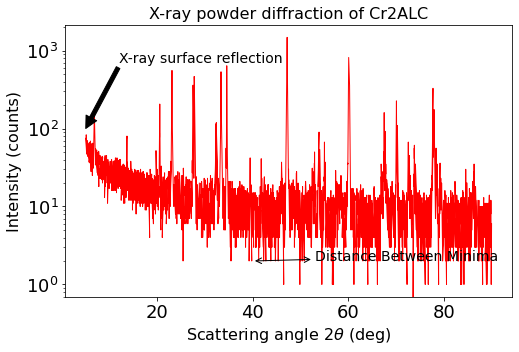

In [94]:
####Solution
xRayString = open('05-17-2018_Cr2ALC.ras','r',encoding='ISO-8859-1').read()
xRayDataIO = io.StringIO(xRayString)
xRayData = np.loadtxt(xRayDataIO,comments="*",unpack=True,dtype=float)
                         
plt.figure(figsize=(8,5))    
plt.plot(xRayData[0],xRayData[1],'r-',linewidth=1)
plt.yscale('log')
plt.xlabel(r'Scattering angle $2\theta$ (deg)', fontsize=16, color='black')
plt.ylabel(r'Intensity (counts)', fontsize=16, color='black')
plt.title('X-ray powder diffraction of Cr2ALC', fontsize=16, color='black')
plt.annotate("X-ray surface reflection", fontsize=14, xy=(5, 100), xytext=(12, 700), arrowprops=dict(facecolor='black'))
plt.annotate("Distance Between Minima", fontsize=14, xy=(40, 2), xytext=(53, 2), arrowprops=dict(arrowstyle='<->',facecolor='black'))
plt.show()
plt.close()
